In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import minerl  # NOTE: we need gym>=0.13.1,<0.20
import gym
# from train import get_agent, get_dynamics_environment, FMC, get_data_handler
from fgz.training.fgz_trainer import FGZTrainer
from fgz.training.xirl_trainer import XIRLTrainer
from xirl_config import XIRLConfig
import torch
import wandb
from tqdm import tqdm
from fgz.data_utils.generate_xirl_targets import generate_target

In [3]:
torch.cuda.empty_cache()  # fix memory leaks

In [4]:
config = XIRLConfig(
    enabled_tasks=[3],  # just waterfall
    disable_fmc_detection=True,  # if true, only classification will occur. 
    use_wandb=False,
    data_workers=1,
    embed_batch_size=4,
    batch_size=4,
    num_frames_per_pair=16,
    num_frames_per_trajectory_to_load=32,
)

In [5]:
dataset_path = config.dataset_paths[0]
print(dataset_path)
# trainer = XIRLTrainer(config)

data/MineRLBasaltMakeWaterfall-v0


In [6]:
model = torch.load("train/xirl_model_7190_looks_decent.pth")

In [7]:
target_embedding = generate_target(config, model, dataset_path)

/home/nollyd/Code/basalt_2022_competition_nollied/fgz/data_utils/data_handler.py:256: UserWarning: Missing video/json path! Skipping... data/MineRLBasaltMakeWaterfall-v0/cheeky-cornflower-setter-0d5b8821ca14 [('20220720', '123734')]
  warn(f"Missing video/json path! Skipping... {trajectory_prefix} {sorted_date_times}")
/home/nollyd/Code/basalt_2022_competition_nollied/fgz/data_utils/data_handler.py:256: UserWarning: Missing video/json path! Skipping... data/MineRLBasaltMakeWaterfall-v0/lovely-persimmon-angora-06119347f21a [('20220716', '232112'), ('20220716', '232613')]
  warn(f"Missing video/json path! Skipping... {trajectory_prefix} {sorted_date_times}")
/home/nollyd/Code/basalt_2022_competition_nollied/fgz/data_utils/data_handler.py:256: UserWarning: Missing video/json path! Skipping... data/MineRLBasaltMakeWaterfall-v0/lovely-persimmon-angora-7a3f261ab2ed [('20220716', '234115')]
  warn(f"Missing video/json path! Skipping... {trajectory_prefix} {sorted_date_times}")
/home/nollyd/Co

In [11]:
target_embedding

tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64)

In [12]:
import matplotlib.pyplot as plt

In [18]:
from fgz.data_utils.data_handler import ContiguousTrajectoryDataLoader
from fgz.data_utils.visualize_xirl import xirl_reward_over_time

loader = ContiguousTrajectoryDataLoader(dataset_path)
trajectory = loader.sample()

/home/nollyd/Code/basalt_2022_competition_nollied/fgz/data_utils/data_handler.py:256: UserWarning: Missing video/json path! Skipping... data/MineRLBasaltMakeWaterfall-v0/cheeky-cornflower-setter-0d5b8821ca14 [('20220720', '123734')]
  warn(f"Missing video/json path! Skipping... {trajectory_prefix} {sorted_date_times}")
/home/nollyd/Code/basalt_2022_competition_nollied/fgz/data_utils/data_handler.py:256: UserWarning: Missing video/json path! Skipping... data/MineRLBasaltMakeWaterfall-v0/lovely-persimmon-angora-06119347f21a [('20220716', '232112'), ('20220716', '232613')]
  warn(f"Missing video/json path! Skipping... {trajectory_prefix} {sorted_date_times}")
/home/nollyd/Code/basalt_2022_competition_nollied/fgz/data_utils/data_handler.py:256: UserWarning: Missing video/json path! Skipping... data/MineRLBasaltMakeWaterfall-v0/lovely-persimmon-angora-7a3f261ab2ed [('20220716', '234115')]
  warn(f"Missing video/json path! Skipping... {trajectory_prefix} {sorted_date_times}")
/home/nollyd/Co

In [19]:
trajectory, len(trajectory)

(CT(data/MineRLBasaltMakeWaterfall-v0/cheeky-cornflower-setter-5e80701c3a3e, nclips=1),
 2147)

In [25]:
rewards = xirl_reward_over_time(config, trajectory, model, target_embedding)

Getting rewards:  94%|█████████▍| 63/67 [01:51<00:07,  1.77s/it]

tensor([1.2759, 1.2356, 1.3133,  ..., 0.2269, 0.2257, 0.2437],
       dtype=torch.float64)


In [26]:
rewards

tensor([1.2759, 1.2356, 1.3133,  ..., 0.2269, 0.2257, 0.2437],
       dtype=torch.float64)

In [28]:
trajectory

CT(data/MineRLBasaltMakeWaterfall-v0/cheeky-cornflower-setter-5e80701c3a3e, nclips=1)

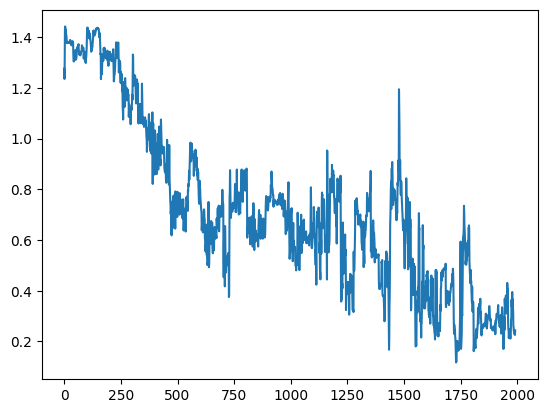

In [27]:
plt.plot(rewards)
plt.show()